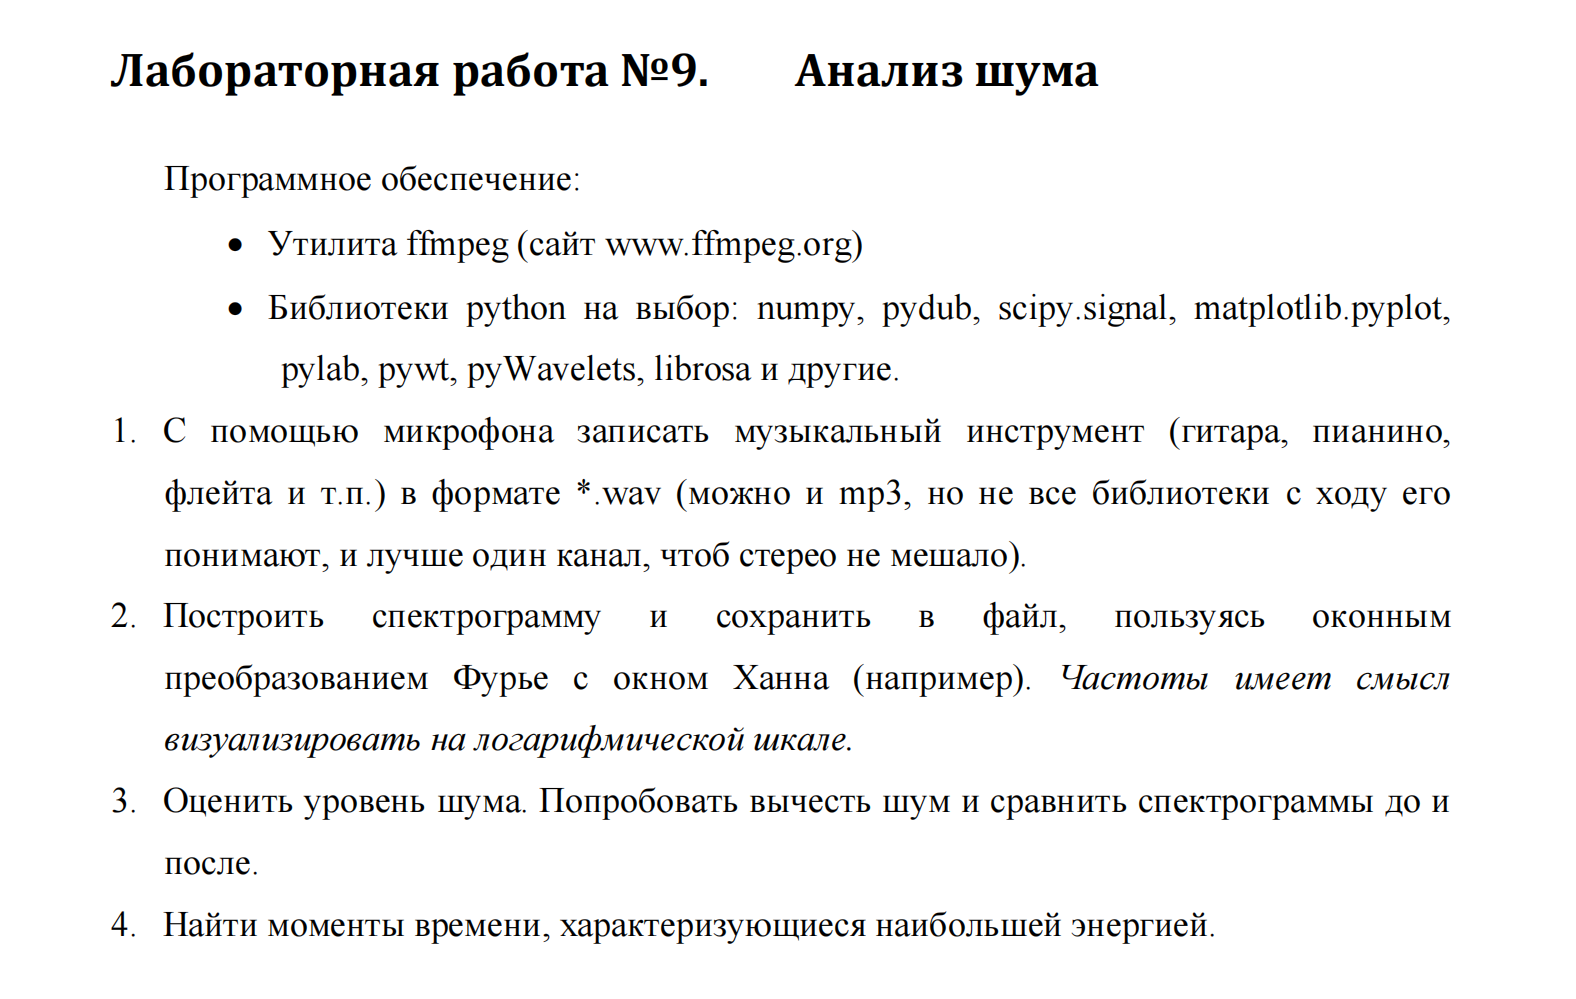

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
import soundfile as sf

In [2]:
def get_spectrogram(filename):
    audio, sr = librosa.load(filename, sr = None)

    window_size = 1024  # Size of the window for the STFT
    hop_length = int(window_size / 4)  # Hop size between consecutive windows
    n_fft = window_size


    spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)


    # Plot the spectrogram
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log') 
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    return plt

In [3]:
# Savgol filter
sample_rate, data = wavfile.read('guitar_grasshopper_mono.wav')
data = data.astype(float)

window_length = 51
polyorder = 3
filtered_data = signal.savgol_filter(data, window_length, polyorder)

filtered_data = filtered_data.astype('int16')
wavfile.write('guitar_grasshopper_filtered_via_savgol_filter.wav', sample_rate, filtered_data)

In [4]:
# Wiener filter
sample_rate, data = wavfile.read("guitar_grasshopper_mono.wav")
data = data.astype(float)

filtered_data = signal.wiener(data)

filtered_data = filtered_data.astype('int16')
wavfile.write('guitar_grasshopper_filtered_via_wiener.wav', sample_rate, filtered_data)

C:\Users\furball\anaconda3\lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
C:\Users\furball\anaconda3\lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


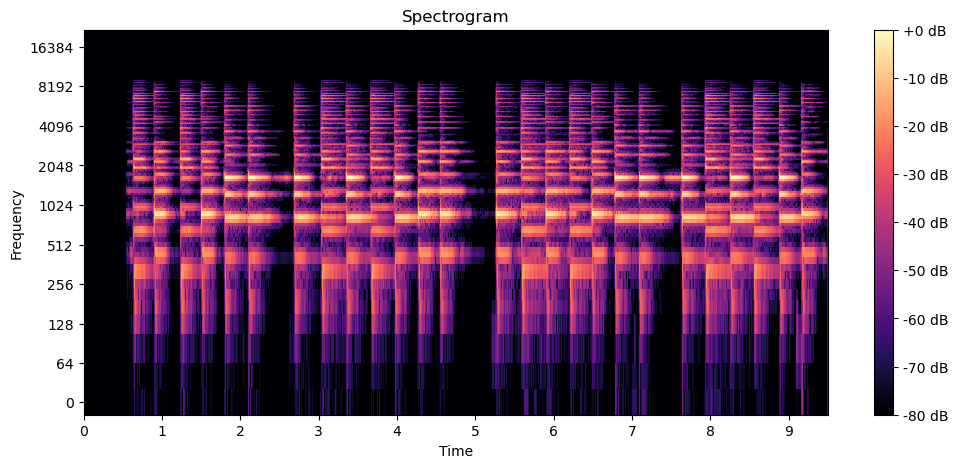

In [5]:
spectrogram_original = get_spectrogram("guitar_grasshopper_mono.wav")
spectrogram_original.savefig('spectrogram_original.png')

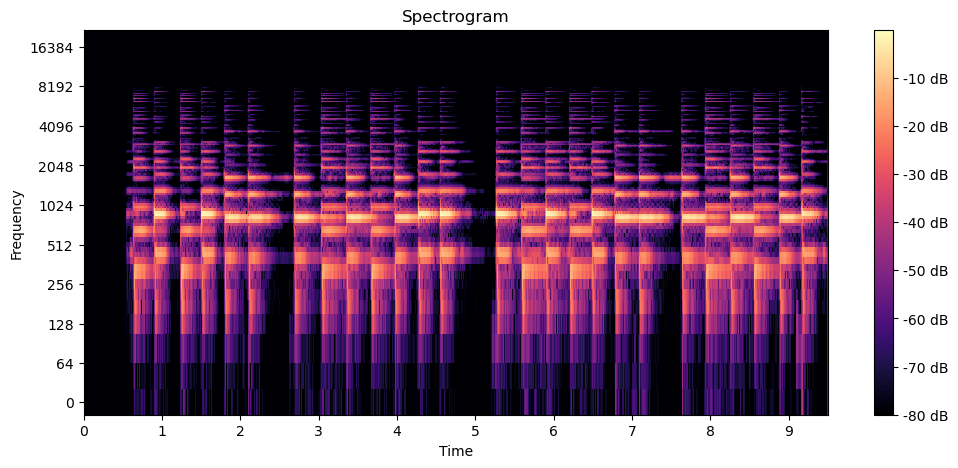

In [6]:
spectrogram_savgol_filter = get_spectrogram("guitar_grasshopper_filtered_via_savgol_filter.wav")
spectrogram_savgol_filter.savefig('spectrogram_savgol_filter.png')

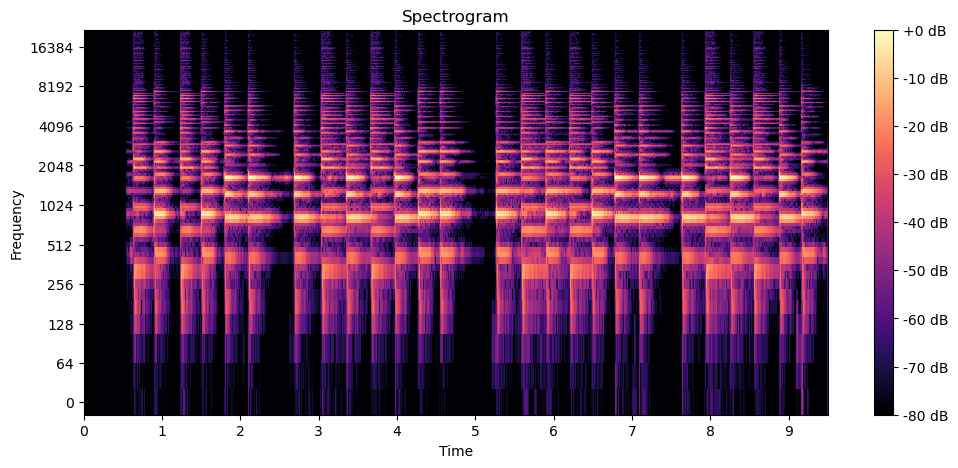

In [7]:
spectrogram_wiener = get_spectrogram("guitar_grasshopper_filtered_via_wiener.wav")
spectrogram_wiener.savefig("spectrogram_wiener.png")

In [8]:
# Add noise to audiofile
audio, sr = librosa.load('guitar_grasshopper_mono.wav', sr = None)
RMS = np.sqrt(np.mean(audio**2))
STD_n = 0.001
noise = np.random.normal(0, STD_n, audio.shape[0])
audio_noise = audio + noise
sf.write('guitar_grasshopper_mono_with_noise.wav', audio_noise, sr)

In [9]:
# Savgol filter for noise audiofile
sample_rate, data = wavfile.read('guitar_grasshopper_mono_with_noise.wav')
data = data.astype(float)
window_length = 51
polyorder = 3

filtered_data = signal.savgol_filter(data, window_length, polyorder)
filtered_data = filtered_data.astype('int16')

wavfile.write('guitar_grasshopper_mono_with_noise_via_savgol_filter.wav', sample_rate, filtered_data)

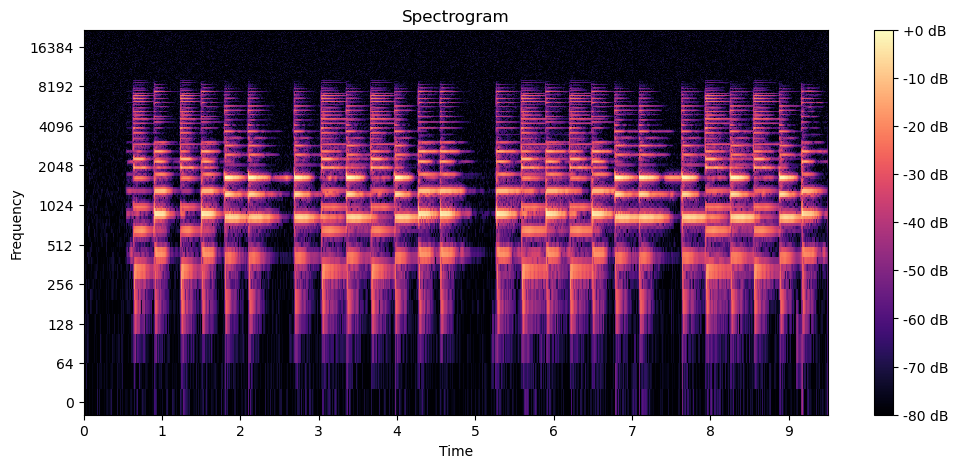

In [10]:
spectrogram_noise = get_spectrogram("guitar_grasshopper_mono_with_noise.wav")
spectrogram_noise.savefig("spectrogram_noise.png")

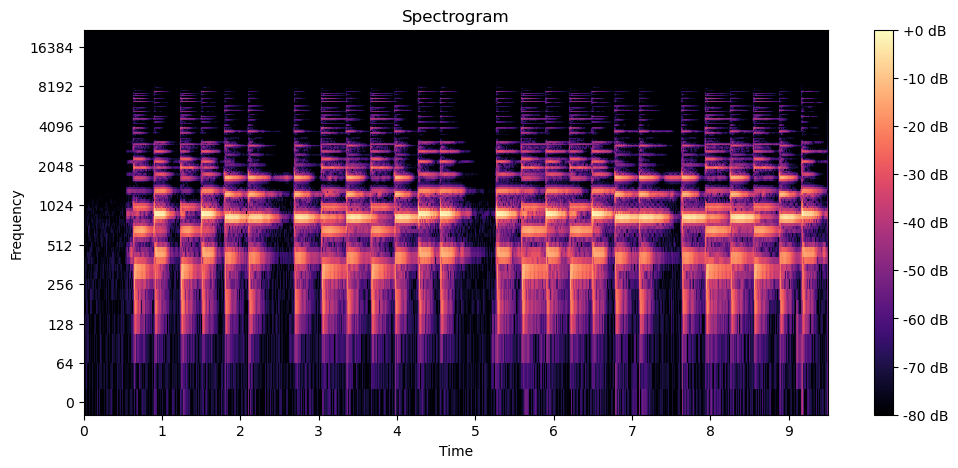

In [11]:
spectrogram_noise_via_savgol = get_spectrogram("guitar_grasshopper_mono_with_noise_via_savgol_filter.wav")
spectrogram_noise_via_savgol.savefig("spectrogram_noise_via_savgol.png")